# Imports

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Estados Eletrónicos

In [74]:
def electronStates(N: int) -> tuple[dict, int]:
    """
        Devolve pelo menos os primeiros `N` estados sob a forma de um dicionário cujas chaves é a soma dos n^2 desse estado e
        cuja entrada correspondente é o número de estados degenerados com essa soma de n^2
    """

    estados = dict()

    total = 0
    nsum = 1 + 1 + 1

    i = 0
    while total < N:
        i += 1

        # Soma máxima dos quadrados
        nsumprev = nsum

        # Procurar estados (a chave é a soma dos n^2 e a entrada é o número de estados)
        for j in range(1, i + 1):
            for k in range(1, j + 1):
                n2 = i**2 + j**2 + k**2
                

                if i == j and j == k:
                    newstates = 1
                elif i == j or j == k:
                    newstates = 3
                else:
                    newstates = 6
                
                estados[n2] = estados.get(n2, 0) + newstates
            
        
        # Próximo valor máximo da soma dos n^2 abaixo do qual vamos listar todos os estados
        nsum = (i+1)**2 + 1 + 1

        # Contar estados que temos a certeza serem os de menor energia
        total += sum(estados.get(e, 0) for e in range(nsumprev, nsum))


    # Devolver o estados e lembrar que apenas temos a certeza da ordem até (i+1)^2 + 1 + 1 - 1 pois o próximo i que iriamos ver pode no mínimo levar a um estado de energia (i+1)^2 + 1 + 1
    return estados, nsum - 1


estados, emax = electronStates(20)
print(emax, estados)
print(sum(estados.get(e, 0) for e in range(0, emax+1)))

17 {3: 1, 6: 3, 9: 3, 12: 1, 11: 3, 14: 6, 17: 3, 19: 3, 22: 3, 27: 1}
20


# Energia de Fermi

Vamos comparar a energia de Fermi exata com o valor termodinâmico desta grandeza ([Ver mais](https://www.notion.so/3-Modelo-de-Sommerfeld-Defini-o-e-Baixas-Temperaturas-1b5c81cfd6824d9fb9b9ad35c3ee0633?pvs=4#c551d9fe4680479cad59ca7c7c8440ad)).

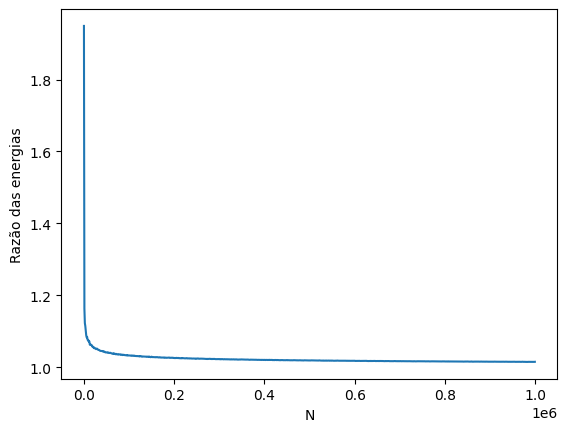

1.015501896171552


In [75]:
def energiaFermi(start: int, stop: int, step: int) -> int:
    """
        Devolve a energia do estado eletrónico mais energético ocupado para `N` eletrões, sob a forma da soma dos n^2 desse estado.
    """
    # N máximo
    NN = np.arange(start, stop, step)
    Nmax = NN[-1]
    Nlen = len(NN)

    # Estados
    estados, emax = electronStates(Nmax // 2 + 1)

    # Energias
    energias = list(estados.keys())
    energias.sort()

    # Energias de Fermi
    EF = np.zeros_like(NN)
    total = 0
    proximo = 0
    for e in energias:
        total += 2 * estados[e]
        
        # Verificar se o próximo conjunto de eletrões não ocupa estados mais energéticos do que este
        while proximo < Nlen and NN[proximo] <= total:
            EF[proximo] = e
            proximo += 1
    
    return EF



# Valores de N
Nstart = 2
Nstop = 1e6
Nstep = 1e3
NN = np.arange(Nstart, Nstop, Nstep)

# EF exata e termodinâmica
EFe = energiaFermi(Nstart, Nstop, Nstep)
EFt = []
for item in NN:
    EFt += [(3 * item / np.pi)**(2/3)]

EFe = np.array(EFe)
EFt = np.array(EFt)

EFr = EFe/ EFt

# Gráfico
plt.plot(NN, EFr, label="$E_F$ exata / $E_F$ termodinâmica ")
plt.xlabel("N")
plt.ylabel("Razão das energias")
plt.show()

print(EFr[-1])